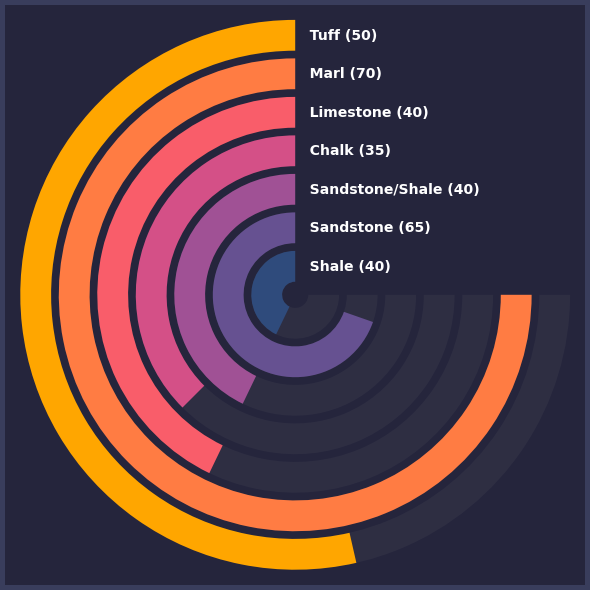

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Load data into pandas dataframe

lith_dict = {'LITH': ['Shale', 'Sandstone', 
                      'Sandstone/Shale', 'Chalk', 
                      'Limestone', 'Marl', 'Tuff'],
             'COUNT': [40,65, 40, 35, 
                            40, 70, 50]}

df = pd.DataFrame.from_dict(lith_dict)

# Get key properties for colours and labels
max_value_full_ring = max(df['COUNT'])

ring_colours = ['#2f4b7c', '#665191', '#a05195','#d45087',
               '#f95d6a','#ff7c43','#ffa600']

ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df['LITH']), 
                                                 list(df['COUNT']))]
data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(10,10), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['COUNT'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

plt.show()